In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 2024-12-04 15:25:10 Wednesday

@author: Nikhil Kapila
"""

import torch, torchvision, mlflow, sys, os
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),'..')))
from utils.model_loader import MLFlowModelLoader

In [2]:
def test_some(model, data, num_images=5):
    transform=transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ])
    import random
    index = random.sample(range(len(data)), num_images)
    model.eval()
    for i in index:
        image, label = data[i]
        input = transform(image).unsqueeze(0)
        with torch.no_grad():
            output = model(input)
            predicted = output.argmax().item()

            plt.figure(figsize=(1,1))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
            print(f'predicted: {predicted}')
            print(f'label: {label}')


## Base Model

In [3]:
from models.cifar10resnet import Cifar10ResNet
from models.originalBasicBlock import OriginalBasicBlock

In [4]:
def load_data(name='CIFAR-10'):
    if name == 'CIFAR-10':
        train_set = torchvision.datasets.CIFAR10(root='../data',
                                                 train=True,
                                                 download=True)
    return train_set

transform=transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ])

In [5]:
base_model = Cifar10ResNet(
    OriginalBasicBlock,
    [3, 3, 3],
    10
)

In [6]:
loader = MLFlowModelLoader(run_id='8da960ad489b42fc8594b98d6daffc86', 
                           experiment_id='394260821350326426')

It seems that the model for this run was not logged.
[Errno 2] No such file or directory: '/Users/nkapila6/Code/CNNtention/mlruns/394260821350326426/8da960ad489b42fc8594b98d6daffc86/artifacts/model/data'
Run Summary:
Params:
 {'max_epochs': '182', 'optimizer': 'SGD', 'momentum': '0.9', 'learning_rate': '0.1', 'weight_decay': '0.0001', 'batch_size': '128'}
Metrics:
 {'test_err': 9.040000000000006, 'train_loss': 0.02918808792591095, 'final accuracy': 0.9096, 'final error': 9.040000000000003, 'train_err': 0.6539999999999964, 'dur': 53.06525659561157}
Artifacts:
 ['optimizer.pth', 'history.json', 'criterion.pth', 'params.pth']


In [7]:
resnet20 = loader.load_weights(base_model)

Object params.pth loaded.


/Users/nkapila6/Code/CNNtention/utils/model_loader.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  object.load_state_dict(torch.load(path))


In [8]:
train = load_data()
image, label = train[0]

Files already downloaded and verified


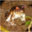

In [9]:
image

In [10]:
input = transform(image).unsqueeze(0)
with torch.no_grad():
    output = resnet20(input)

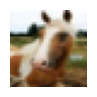

predicted: 7
label: 7


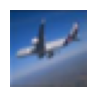

predicted: 0
label: 0


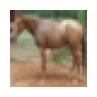

predicted: 7
label: 7


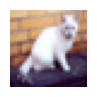

predicted: 3
label: 3


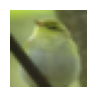

predicted: 2
label: 2


In [11]:
# CIFAR 10 Labels
# 0 'airplane’,
# 1 'automobile’,
# 2 ‘ bird’,
# 3 'cat’,
# 4 'deer’,
# 5 'dog’,
# 6 'frog’,
# 7 'horse’,
# 8 'ship’,
# 9 'truck'

test_some(resnet20, train, 5)